In [1]:
# !pip install tensorflow

In [2]:
# !pip install --upgrade tensorflow

In [3]:
# !pip install patchify


In [4]:
# !pip install opencv-python

In [168]:
# !pip install wandb 

In [1]:
import wandb

wandb.login(key="9ccb4e36bbc36c671c3be070f0b1754bc48a365f")

wandb: Currently logged in as: eslamelnahas1010 (eslamelnahas1010-benha-university). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Lenovo\_netrc


True

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


In [5]:
dataset_root_folder = 'F:\AI Courses\Test\datasets\Satellite/'

In [7]:
dataset_name = 'DubaiDataset'

In [9]:
minmaxscaler = MinMaxScaler()

In [11]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 #print(dir_name)
  if dir_name == 'masks': #images
   images=os.listdir(path)
   print(path)
   #print(images)
   for i,image_name in enumerate(images):
    if image_name.endswith('.png'): #jpg
     #print(image_name)
     a=True

F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 1\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 2\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 3\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 4\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 5\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 6\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 7\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 8\masks


In [12]:
image_patch_size=256

In [13]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [14]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [15]:
len(image_patches)

2

In [16]:
image_dataset=[]
mask_dataset=[]
for image_type in ['images','masks']:
  if image_type=='images':
   image_extestion='jpg'
  elif image_type=='masks':
   image_extestion='png'
  for tile_id in range(1,8):
    for image_id in range (1,20):
      image =cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extestion}',1)
      if image is not None:
        if image_type=='masks':
         image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print('{}---- {} -- {}'.format(image.shape,size_x,size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('{} , {}'.format(image.size[0],image.size[1]))
        image=np.array(image)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =individual_patched_image [0]
              #print(individual_patched_image )
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [17]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [23]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [24]:
type(image_dataset[0])

numpy.ndarray

In [25]:
type(np.reshape(image_dataset[0],image_patch_size*image_patch_size*3))

numpy.ndarray

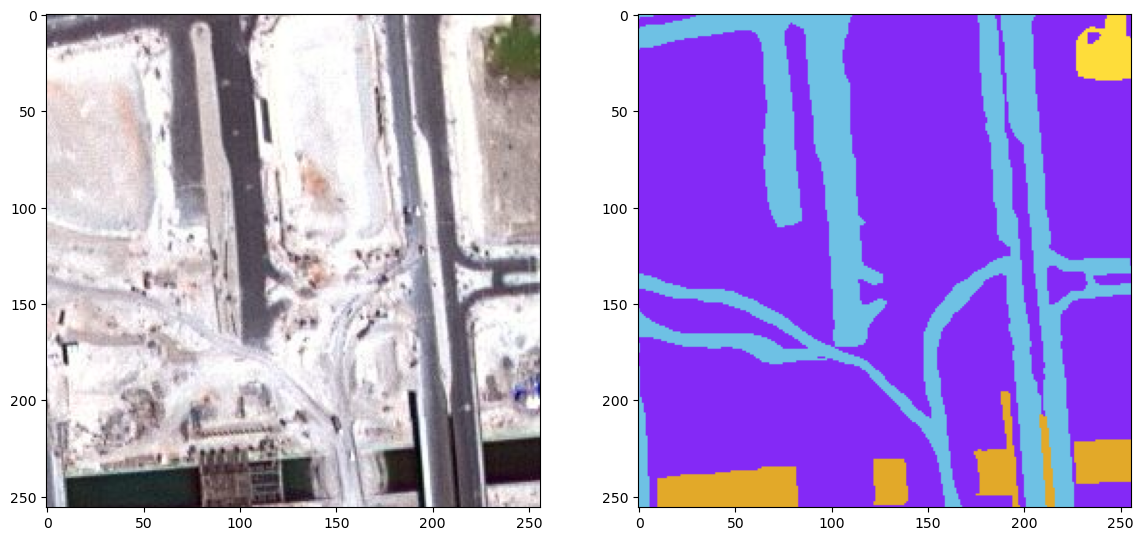

In [26]:
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [27]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
#3C1098
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
#8429F6
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
#6EC1E4
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_Vegetation='#FEDD3A'
class_Vegetation=class_Vegetation.lstrip('#')
#FEDD3A
class_Vegetation=np.array(tuple(int(class_Vegetation[i:i+2],16) for i in (0,2,4)))
print(class_Vegetation)

class_Water='#E2A929'
class_Water=class_Water.lstrip('#')
#E2A929
class_Water=np.array(tuple(int(class_Water[i:i+2],16) for i in (0,2,4)))
print(class_Water)


class_Unlabeled='#9B9B9B'
class_Unlabeled=class_Unlabeled.lstrip('#')
#9B9B9B
class_Unlabeled=np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [28]:
mask_dataset.shape[0]

945

In [29]:
label=individual_patched_mask

In [30]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_Water,axis=-1)]=0
  label_segment[np.all(label==class_land,axis=-1)]=1
  label_segment[np.all(label==class_road,axis=-1)]=2
  label_segment[np.all(label==class_building,axis=-1)]=3
  label_segment[np.all(label==class_Vegetation,axis=-1)]=4
  label_segment[np.all(label==class_Unlabeled,axis=-1)]=5
  #print(label_segment)
  label_segment=label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [31]:
labels=[]
for i in range (mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [32]:
labels=np.expand_dims(labels,axis=3)

In [33]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [34]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [35]:
print('The label unique value is: ',format(np.unique(labels)))

The label unique value is:  [0 1 2 3 4 5]


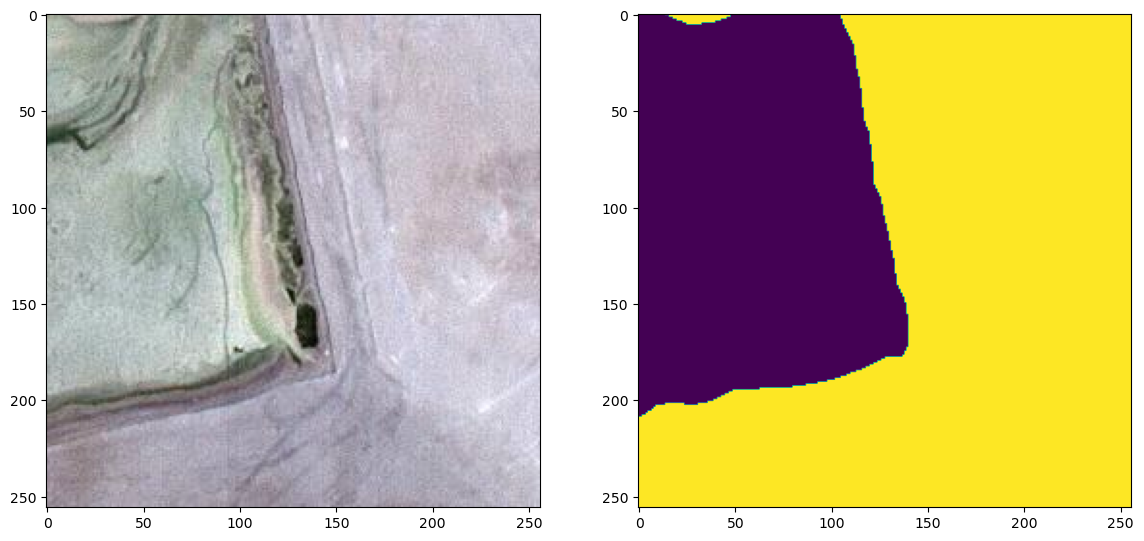

In [36]:

random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [37]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [38]:
total_classes=len(np.unique(labels))

In [39]:
total_classes

6

In [40]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [41]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [42]:
master_trianing_dataset = image_dataset


In [43]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(master_trianing_dataset ,labels_categorical_dataset, test_size=0.15, random_state=100)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [46]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [47]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [48]:
# !pip install -U segmentation-models

In [49]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [50]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [51]:
# from keras import backend as K
from tensorflow.keras import backend as K


In [52]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [53]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [54]:
metrics = ["accuracy", Jaccard_coef ]


In [55]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [56]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [57]:
model = get_deep_learning_model()

In [58]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [59]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [60]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [61]:
total_loss = dice_loss + (1 * focal_loss)


In [62]:
import tensorflow as tf

In [63]:
# tf.compat.v1.reset_default_graph()

In [64]:
tf.keras.backend.clear_session()


In [65]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [66]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# !pip install pydot


In [70]:
# !pip install graphviz

In [71]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

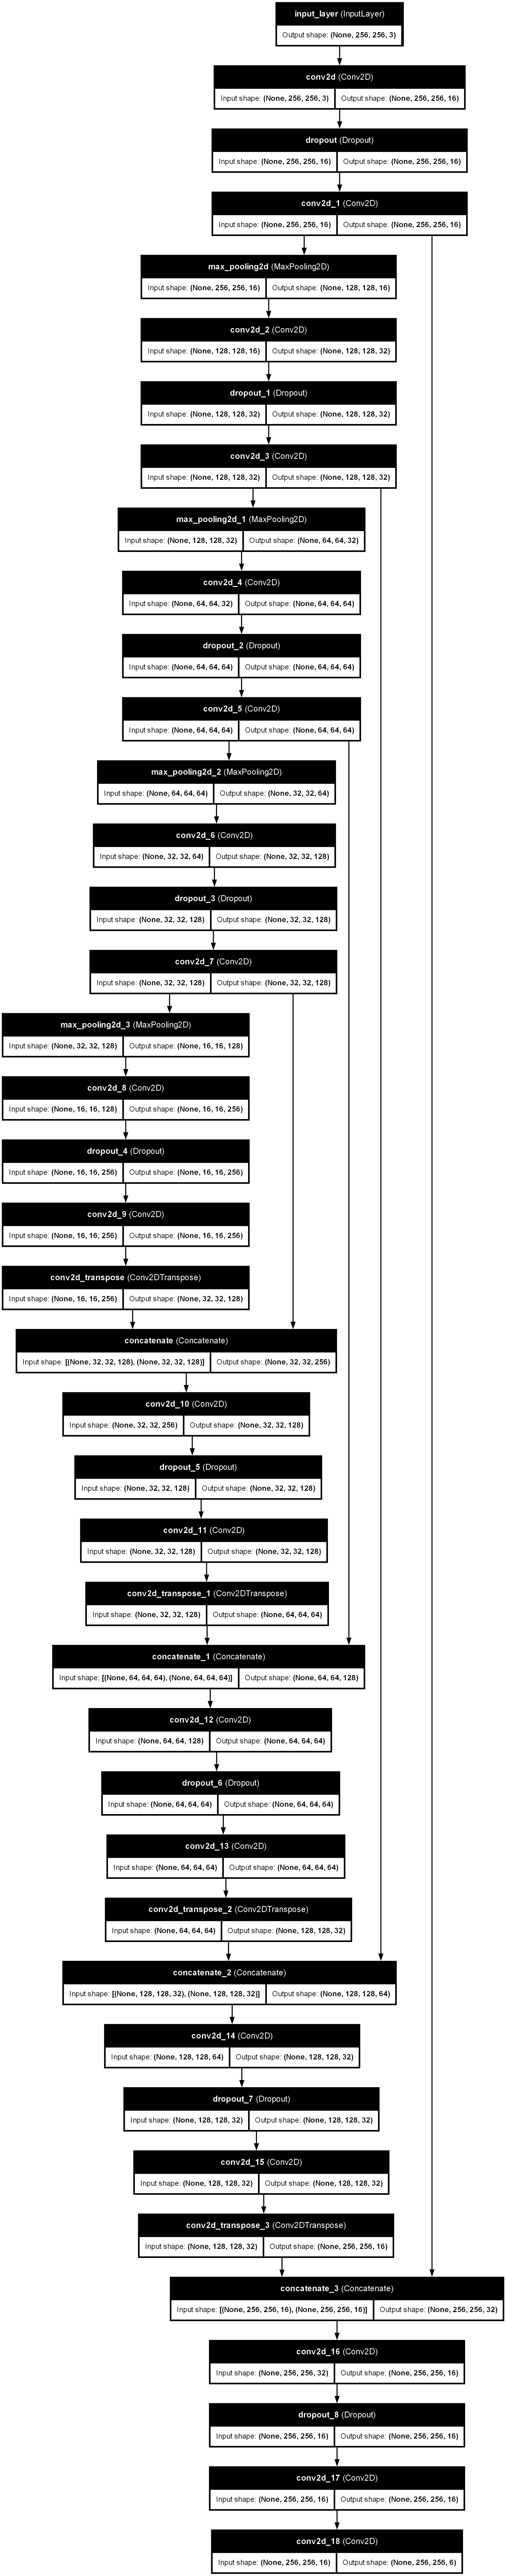

In [75]:
plot_model(model, to_file='Satellite_model_plot.png', show_shapes=True, show_layer_names=True)

In [81]:
from IPython.display import clear_output
%matplotlib inline

In [82]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.jal_Jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()


In [83]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

In [141]:
from wandb.integration.keras import WandbMetricsLogger # WandbCallback was deprecated and replaced by WandbMetricsLogger

In [129]:
wandb.init(project="Satellite-segmentation-images")

In [131]:
wandb.login(key="9ccb4e36bbc36c671c3be070f0b1754bc48a365f")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [133]:
! wandb

Usage: wandb [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.


In [134]:
! wandb status

  --help     Show this message and exit.

Commands:
  agent         Run the W&B agent
  artifact      Commands for interacting with artifacts
  beta          Beta versions of wandb CLI commands.
  controller    Run the W&B local sweep controller
  disabled      Disable W&B.
  docker        Run your code in a docker container.
  docker-run    Wrap `docker run` and adds WANDB_API_KEY and WANDB_DOCKER...
  enabled       Enable W&B.
  init          Configure a directory with Weights & Biases
  job           Commands for managing and viewing W&B jobs
  launch        Launch or queue a W&B Job.
  launch-agent  Run a W&B launch agent.
  launch-sweep  Run a W&B launch sweep (Experimental).
  login         Login to Weights & Biases
  offline       Disable W&B sync
  online        Enable W&B sync
  pull          Pull files from Weights & Biases
  restore       Restore code, config and docker state for a run
  scheduler     Run a W&B launch sweep scheduler (Experimental)
  server        Commands f

In [143]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[WandbMetricsLogger()],
                          shuffle=False)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.4440 - jaccard_coef: 0.1984 - loss: 1.0121 - val_accuracy: 0.5457 - val_jaccard_coef: 0.3073 - val_loss: 0.9936
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.5848 - jaccard_coef: 0.3249 - loss: 0.9902 - val_accuracy: 0.6853 - val_jaccard_coef: 0.4663 - val_loss: 0.9699
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 234s 5s/step - accuracy: 0.7325 - jaccard_coef: 0.4859 - loss: 0.9599 - val_accuracy: 0.7013 - val_jaccard_coef: 0.4656 - val_loss: 0.9658
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.7485 - jaccard_coef: 0.5089 - loss: 0.9508 - val_accuracy: 0.6896 - val_jaccard_coef: 0.4499 - val_loss: 0.9718
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.7541 - jaccard_coef: 0.5202 - loss: 0.9495 - val_accuracy: 0.6996 - val_jaccard_coef: 0.4693 - val_loss: 0.9666
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.7663 - jaccard_coef: 0.5453 - loss: 0.9453 - val_a

In [145]:
history_a=model_history
history_a.history

{'accuracy': [0.5294275283813477,
  0.6368678212165833,
  0.7377147078514099,
  0.7514228820800781,
  0.7612953782081604,
  0.7716696262359619,
  0.7815835475921631,
  0.7930030226707458,
  0.8041003346443176,
  0.8136136531829834],
 'jaccard_coef': [0.25113093852996826,
  0.3632444441318512,
  0.4871441423892975,
  0.5112188458442688,
  0.5258788466453552,
  0.5499858260154724,
  0.5707049369812012,
  0.5898706912994385,
  0.6089390516281128,
  0.6254726052284241],
 'loss': [1.0029704570770264,
  0.9822503924369812,
  0.957038164138794,
  0.9499275088310242,
  0.9470720291137695,
  0.9431247115135193,
  0.93985515832901,
  0.9363337755203247,
  0.9321048259735107,
  0.9287164807319641],
 'val_accuracy': [0.5457422137260437,
  0.6852541565895081,
  0.7012720108032227,
  0.6896136403083801,
  0.6995843052864075,
  0.6952403783798218,
  0.7370383143424988,
  0.7590060234069824,
  0.7530283331871033,
  0.7733507752418518],
 'val_jaccard_coef': [0.30731433629989624,
  0.46627745032310486,


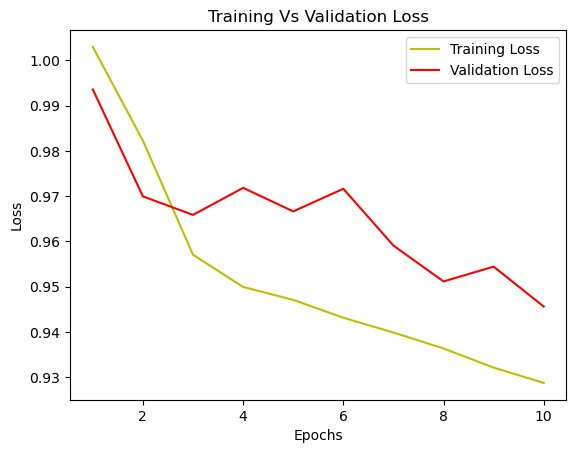

In [147]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

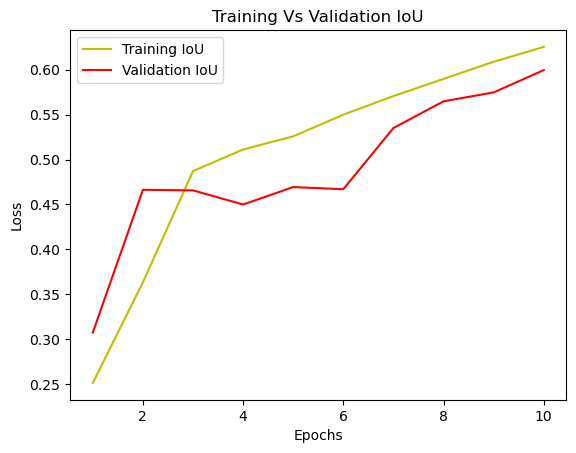

In [149]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [151]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [153]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [154]:
len(y_pred)

142

In [155]:
y_pred

array([[[[7.68238455e-02, 3.21422815e-01, 2.38781244e-01,
          1.30474761e-01, 1.37351230e-01, 9.51462314e-02],
         [5.28955981e-02, 5.07075012e-01, 1.96225628e-01,
          1.12070628e-01, 9.74978656e-02, 3.42352279e-02],
         [4.81730849e-02, 5.54722786e-01, 1.74789026e-01,
          9.98008996e-02, 9.59861875e-02, 2.65279952e-02],
         ...,
         [8.83517861e-02, 3.12232763e-01, 2.56996512e-01,
          5.90909272e-02, 2.35979959e-01, 4.73480187e-02],
         [8.88943896e-02, 3.10187936e-01, 2.68007934e-01,
          7.51501843e-02, 2.04339147e-01, 5.34204580e-02],
         [1.02041349e-01, 2.38279983e-01, 2.84454852e-01,
          9.11873654e-02, 2.07789049e-01, 7.62473717e-02]],

        [[2.77603325e-02, 4.88868505e-01, 2.22864538e-01,
          1.27552196e-01, 8.85023102e-02, 4.44520675e-02],
         [1.08281467e-02, 7.98672736e-01, 9.67220664e-02,
          6.03739694e-02, 2.65707150e-02, 6.83241198e-03],
         [1.05854012e-02, 8.48848701e-01, 6.6836

In [156]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [157]:
len(y_pred_argmax)

142

In [158]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 4],
        [4, 4, 4, ..., 0, 0, 4]],

       [[4, 2, 2, ..., 1, 1, 2],
        [4, 4, 1, ..., 1, 1, 1],
        [4, 1, 1, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 1, 4, 4],
        [1, 1, 1, ..., 1, 1, 4]],

       [[0, 0, 0, ..., 0, 4, 4],
        [0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [159]:
y_test_argmax = np.argmax(y_test, axis=3)

In [160]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [161]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


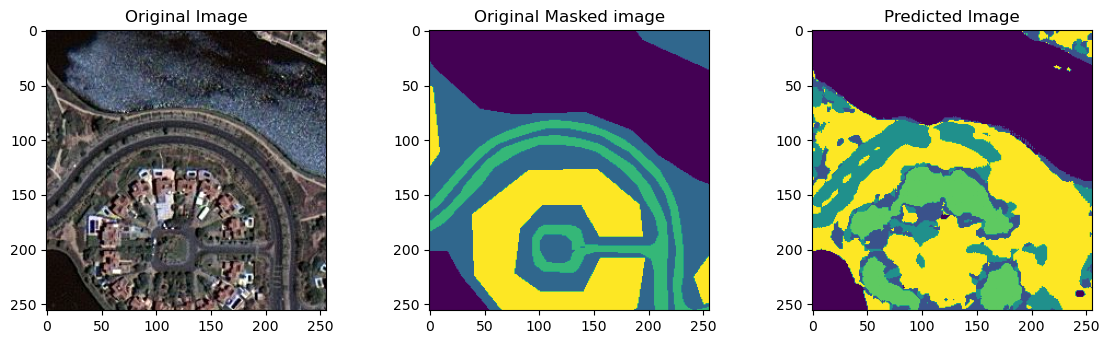

In [162]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [163]:
from tensorflow.keras.saving import save_model

from IPython.display import FileLink

# Save the model
model.save('my_model.keras')

# Generate a link to download the file
FileLink('my_model.keras')

C:\Users\Lenovo\Deep_satellite_imagery\my_model.keras